### Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import numpy as np
import requests
import datetime
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline 
sns.set(color_codes=True)

# Foursquare

In [2]:
df_fsq = pd.read_csv("../data/fsq_restaurant_bar_cafe_data.csv", index_col=0)
display(df_fsq.head(5))

Station_ID        Station Name  \
0  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
1  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
2  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
3  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
4  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   

                     FSQ_ID                    Venue Name   Latitude  \
0  4fd3a01be4b0540d9cb027ea                     Moii Cafe  49.262562   
1  4b1db335f964a520211424e3                 Marulilu Cafe  49.263364   
2  4aa8320cf964a520f94f20e3                  Blenz Coffee  49.263421   
3  5bcb670ad0a149002dede4fa  Jammer Cafe and Urban Garage  49.263663   
4  4be48099910020a134ced114         Cultured Coffee & Tea  49.260682   

    Longitude  Distance                                            Address  \
0 -123.115171        57  2559 Cambie St (btwn W Broadway & W 10th Ave),...   
1 -123.113942        96  451W Broadway W (at Cambie St), Vancouver BC V...   
2 -123.115731       144  521W Broadway W (at Cambie St), Vancouver BC V...   
3 -123.112021       188                350 8th Ave W, Vancouver BC V5Y 3X2   
4 -123.116309       223  555 12th Ave W (at Cambie St in City Square Sh...   

  Category name  Rating  Popularity  Price  Total Photos  Total Ratings  \
0          Café     8.0    0.221702    1.0          67.0           55.0   
1          Café     8.2    0.953849    2.0         128.0          111.0   
2          Café     5.4    0.977400    1.0          33.0           31.0   
3          Café     NaN    0.550903    1.0           NaN            NaN   
4   Coffee Shop     NaN    0.794641    1.0           NaN            NaN   

   Total Tips  
0        18.0  
1        32.0  
2        15.0  
3         NaN  
4         NaN

In [3]:
df_fsq.shape

(6353, 15)

In [4]:
# count() will count everything excluding NaNs

df_fsq.count()

Station_ID       6353
Station Name     6353
FSQ_ID           6353
Venue Name       6353
Latitude         6353
Longitude        6353
Distance         6353
Address          6353
Category name    6353
Rating           4993
Popularity       6353
Price            5887
Total Photos     4952
Total Ratings    4993
Total Tips       4911
dtype: int64

In [5]:
# Sort values by column name

df_fsq.sort_values("Venue Name", inplace = True)
df_fsq.head()


Station_ID               Station Name  \
2  9bee3167f10c884044cea0d36afcd1ef        0298 6th & Carolina   
1  1c8f7fd6535db12cc45cfc59aa9da058  0265 St Catherines & 10th   
8  0c9ad3e3703e5869b82619ecdf54f43e          0197 1st & Scotia   
9  6c0de983fb47a3439a9e3c36a3d15804         0107 8th & Ontario   
6  521c2122c791ed038168c3b8ff24061b        0132 14th & Ontario   

                     FSQ_ID    Venue Name   Latitude   Longitude  Distance  \
2  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       719   
1  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       847   
8  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       935   
9  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       732   
6  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       602   

                                         Address Category name  Rating  \
2  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   
1  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   
8  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   
9  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   
6  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   

   Popularity  Price  Total Photos  Total Ratings  Total Tips  
2    0.908105    1.0          95.0           36.0         8.0  
1    0.908105    1.0          95.0           36.0         8.0  
8    0.908105    1.0          95.0           36.0         8.0  
9    0.908105    1.0          95.0           36.0         8.0  
6    0.908105    1.0          95.0           36.0         8.0

In [6]:
# Find duplicates
duplicate_rows_df_fsq = df_fsq[df_fsq.duplicated()]


print("number of duplicate rows: ", duplicate_rows_df_fsq.shape)

#shows that I have 348 duplicate rows


number of duplicate rows:  (348, 15)


In [7]:
# Drop duplicates in FSQ df

df_fsq_no_duplicates = df_fsq.drop_duplicates()

display(df_fsq_no_duplicates.head())
df_fsq_no_duplicates.shape

Station_ID               Station Name  \
2  9bee3167f10c884044cea0d36afcd1ef        0298 6th & Carolina   
1  1c8f7fd6535db12cc45cfc59aa9da058  0265 St Catherines & 10th   
8  0c9ad3e3703e5869b82619ecdf54f43e          0197 1st & Scotia   
9  6c0de983fb47a3439a9e3c36a3d15804         0107 8th & Ontario   
6  521c2122c791ed038168c3b8ff24061b        0132 14th & Ontario   

                     FSQ_ID    Venue Name   Latitude   Longitude  Distance  \
2  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       719   
1  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       847   
8  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       935   
9  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       732   
6  5435001d498ef9b3e24d2e0a  12 Kings Pub  49.260357 -123.096734       602   

                                         Address Category name  Rating  \
2  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   
1  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   
8  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   
9  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   
6  395 Kingsway (12th Ave), Vancouver BC V5T 3J7           Pub     7.3   

   Popularity  Price  Total Photos  Total Ratings  Total Tips  
2    0.908105    1.0          95.0           36.0         8.0  
1    0.908105    1.0          95.0           36.0         8.0  
8    0.908105    1.0          95.0           36.0         8.0  
9    0.908105    1.0          95.0           36.0         8.0  
6    0.908105    1.0          95.0           36.0         8.0

(6005, 15)

In [8]:
# FSQ - find shape after duplicates dropped

df_fsq_no_duplicates.shape

(6005, 15)

In [9]:
# FSQ - Dropping the missing or null values.

print(df_fsq_no_duplicates.isnull().sum())

Station_ID          0
Station Name        0
FSQ_ID              0
Venue Name          0
Latitude            0
Longitude           0
Distance            0
Address             0
Category name       0
Rating           1283
Popularity          0
Price             461
Total Photos     1324
Total Ratings    1283
Total Tips       1361
dtype: int64


In [10]:
# FSQ - Dropping the missing values.

df_fsq_no_duplicates_no_na = df_fsq_no_duplicates.dropna()    
df_fsq_no_duplicates_no_na.count()

Station_ID       4285
Station Name     4285
FSQ_ID           4285
Venue Name       4285
Latitude         4285
Longitude        4285
Distance         4285
Address          4285
Category name    4285
Rating           4285
Popularity       4285
Price            4285
Total Photos     4285
Total Ratings    4285
Total Tips       4285
dtype: int64

In [11]:
# FSQ - Check if any NaN's left

print(df_fsq_no_duplicates_no_na.isnull().sum())   # After dropping the values

Station_ID       0
Station Name     0
FSQ_ID           0
Venue Name       0
Latitude         0
Longitude        0
Distance         0
Address          0
Category name    0
Rating           0
Popularity       0
Price            0
Total Photos     0
Total Ratings    0
Total Tips       0
dtype: int64


In [12]:
# FSQ - Detect Outliers

<AxesSubplot:xlabel='Distance'>

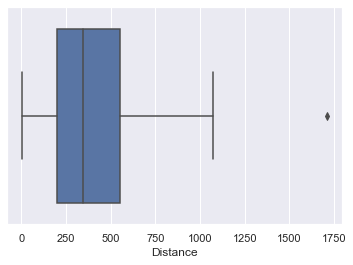

In [13]:
sns.boxplot(x=df_fsq_no_duplicates_no_na['Distance'])

<AxesSubplot:xlabel='Rating'>

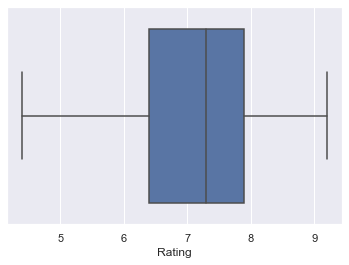

In [14]:
sns.boxplot(x=df_fsq_no_duplicates_no_na['Rating'])

<AxesSubplot:xlabel='Popularity'>

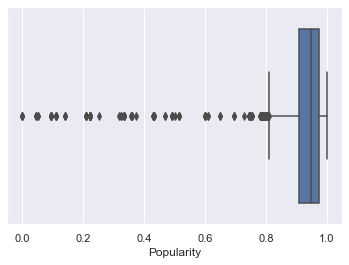

In [15]:
sns.boxplot(x=df_fsq_no_duplicates_no_na['Popularity'])

<AxesSubplot:xlabel='Price'>

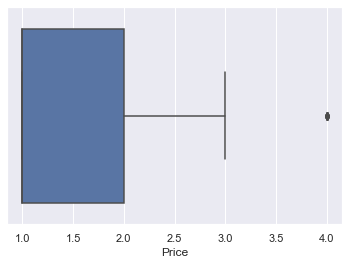

In [16]:
sns.boxplot(x=df_fsq_no_duplicates_no_na['Price'])

<AxesSubplot:xlabel='Total Photos'>

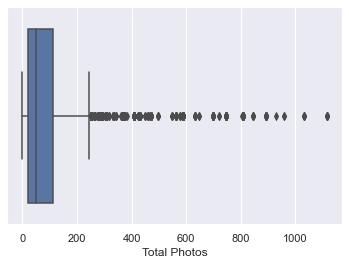

In [17]:
sns.boxplot(x=df_fsq_no_duplicates_no_na['Total Photos'])

<AxesSubplot:xlabel='Total Ratings'>

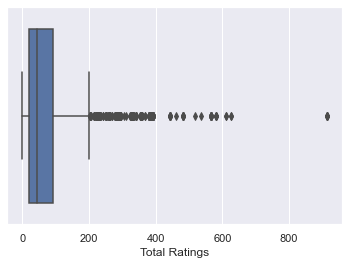

In [18]:
sns.boxplot(x=df_fsq_no_duplicates_no_na['Total Ratings'])

<AxesSubplot:xlabel='Total Tips'>

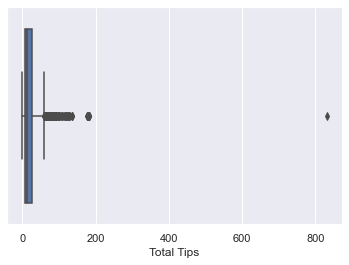

In [19]:
sns.boxplot(x=df_fsq_no_duplicates_no_na['Total Tips'])

In [20]:
# FSQ - Drop Outliers using  IQR score technique

Original shape of FSQ df: (6353, 15)

As seen above there were around 2774 rows were outliers. 
There are more outliers in Foursquare's data and so I've used the IQR score technique.

In [21]:
Q1 = df_fsq_no_duplicates_no_na.quantile(0.25)
Q3 = df_fsq_no_duplicates_no_na.quantile(0.75)
IQR = Q3 - Q1
print(IQR)ased on 

Latitude           0.017439
Longitude          0.033427
Distance         351.000000
Rating             1.500000
Popularity         0.065486
Price              1.000000
Total Photos      91.000000
Total Ratings     72.000000
Total Tips        21.000000
dtype: float64


In [22]:
df_fsq_no_dupes_na_outlier = df_fsq_no_duplicates_no_na[~((df_fsq_no_duplicates_no_na < (Q1 - 1.5 * IQR)) |(df_fsq_no_duplicates_no_na > (Q3 + 1.5 * IQR))).any(axis=1)]
df_fsq_no_dupes_na_outlier.shape

# Note: Not all outliers are likely removed

/var/folders/7g/kpw1gjw539l9x_wr2fw8njj80000gn/T/ipykernel_81730/2069791518.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_fsq_no_dupes_na_outlier = df_fsq_no_duplicates_no_na[~((df_fsq_no_duplicates_no_na < (Q1 - 1.5 * IQR)) |(df_fsq_no_duplicates_no_na > (Q3 + 1.5 * IQR))).any(axis=1)]


(3579, 15)

## Yelp

In [23]:
df_yelp = pd.read_csv("../data/yelp_restaurant_bar_cafe_data.csv", index_col=0)
display(df_yelp.head(5))

Station ID        Station Name  \
0  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
1  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
2  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
3  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
4  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   

                  Yelp ID                            Venue Name Price  \
0  PrKpa6Ejv1v1WvIIywYMvg                   Aperture Coffee Bar    $$   
1  NensKn1MSVU_rm-1Y6WlFA                         Marulilu Cafe    $$   
2  X-73k3cwBjjc170MOdPa7A                        Elysian Coffee    $$   
3  dh-h2jbsa2ElN5Db0vfotQ  On the Grind - Pedalling Epic Coffee     $   
4  UkSNdIF54dvas25eh_CmFw                      Caffe Cittadella    $$   

   Review Count  Rating   Latitude   Longitude    Distance  \
0           122     4.0  49.263204 -123.110470  295.924920   
1           281     4.0  49.263380 -123.114150  102.329817   
2           207     3.5  49.262940 -123.117280  221.080646   
3             4     5.0  49.261226 -123.113927  144.308422   
4           152     4.0  49.264809 -123.117267  331.734686   

                                          Address Category name  
0   243 W Broadway, Vancouver, BC V5Y 3L1, Canada  Coffee & Tea  
1   451 W Broadway, Vancouver, BC V5Y 1R4, Canada         Cafes  
2   590 W Broadway, Vancouver, BC V5Z 1E9, Canada  Coffee & Tea  
3                           Vancouver, BC, Canada  Coffee & Tea  
4  2310 Ash Street, Vancouver, BC V5Z 3C2, Canada  Coffee & Tea

In [24]:
df_yelp.shape

(13615, 12)

In [25]:
# Yelp - Find duplicate values

duplicate_rows_df_yelp = df_yelp[df_yelp.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_yelp.shape)

number of duplicate rows:  (1013, 12)


In [26]:
# Yelp - Count number of rows

df_yelp.count()

Station ID       13615
Station Name     13615
Yelp ID          13615
Venue Name       13615
Price            10045
Review Count     13615
Rating           13615
Latitude         13615
Longitude        13615
Distance         13615
Address          13615
Category name    13615
dtype: int64

##### Above, there are 13615 rows and we are removing 1013 rows of duplicate data.



In [27]:
# Yelp - Remove duplicates

df_yelp_no_dupes = df_yelp.drop_duplicates()
df_yelp_no_dupes.head(5)

Station ID        Station Name  \
0  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
1  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
2  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
3  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   
4  7a19c49f486d7c0c02b3685d7b240448  0001 10th & Cambie   

                  Yelp ID                            Venue Name Price  \
0  PrKpa6Ejv1v1WvIIywYMvg                   Aperture Coffee Bar    $$   
1  NensKn1MSVU_rm-1Y6WlFA                         Marulilu Cafe    $$   
2  X-73k3cwBjjc170MOdPa7A                        Elysian Coffee    $$   
3  dh-h2jbsa2ElN5Db0vfotQ  On the Grind - Pedalling Epic Coffee     $   
4  UkSNdIF54dvas25eh_CmFw                      Caffe Cittadella    $$   

   Review Count  Rating   Latitude   Longitude    Distance  \
0           122     4.0  49.263204 -123.110470  295.924920   
1           281     4.0  49.263380 -123.114150  102.329817   
2           207     3.5  49.262940 -123.117280  221.080646   
3             4     5.0  49.261226 -123.113927  144.308422   
4           152     4.0  49.264809 -123.117267  331.734686   

                                          Address Category name  
0   243 W Broadway, Vancouver, BC V5Y 3L1, Canada  Coffee & Tea  
1   451 W Broadway, Vancouver, BC V5Y 1R4, Canada         Cafes  
2   590 W Broadway, Vancouver, BC V5Z 1E9, Canada  Coffee & Tea  
3                           Vancouver, BC, Canada  Coffee & Tea  
4  2310 Ash Street, Vancouver, BC V5Z 3C2, Canada  Coffee & Tea

In [28]:
df_yelp_no_dupes.count()

Station ID       12602
Station Name     12602
Yelp ID          12602
Venue Name       12602
Price             9287
Review Count     12602
Rating           12602
Latitude         12602
Longitude        12602
Distance         12602
Address          12602
Category name    12602
dtype: int64

In [29]:
# Yelp - Dropping the missing or null values

In [30]:
# Yelp - Find the sum of Nulls in df

print(df_yelp.isnull().sum())

Station ID          0
Station Name        0
Yelp ID             0
Venue Name          0
Price            3570
Review Count        0
Rating              0
Latitude            0
Longitude           0
Distance            0
Address             0
Category name       0
dtype: int64


In [31]:
# Yelp - # Dropping the missing values.

df_yelp_no_dupes_na = df_yelp_no_dupes.dropna()    
df_yelp_no_dupes_na.count()

# Now we have removed all the rows which contain the Null/NaN values (Price).

Station ID       9287
Station Name     9287
Yelp ID          9287
Venue Name       9287
Price            9287
Review Count     9287
Rating           9287
Latitude         9287
Longitude        9287
Distance         9287
Address          9287
Category name    9287
dtype: int64

In [32]:
# Yelp - Check if nulls/NaNs were removed after dropping the values

print(df_yelp_no_dupes_na.isnull().sum())   

Station ID       0
Station Name     0
Yelp ID          0
Venue Name       0
Price            0
Review Count     0
Rating           0
Latitude         0
Longitude        0
Distance         0
Address          0
Category name    0
dtype: int64


In [33]:
# Yelp - Detecting Outliers

<AxesSubplot:xlabel='Review Count'>

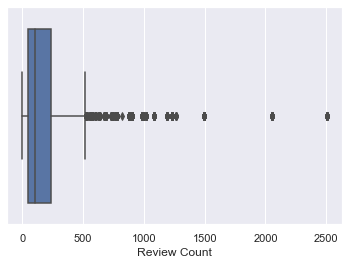

In [34]:
sns.boxplot(x=df_yelp_no_dupes_na['Review Count'])

In [79]:
from scipy import stats

#Finding Z Score on Column
stats.zscore(df_yelp_no_dupes_na['Review Count'])

#Turning Absolute
np.abs(stats.zscore(df_yelp_no_dupes_na['Review Count']))

# Remove the outliers
df_yelp_no_dupes_na_outlier = df_yelp_no_dupes_na[(np.abs(stats.zscore(df_yelp_no_dupes_na['Review Count']))<3)]
df_yelp_no_dupes_na_outlier.shape

(9072, 12)

<AxesSubplot:xlabel='Review Count'>

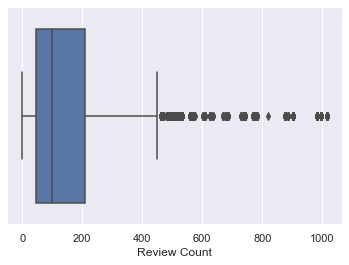

In [36]:
sns.boxplot(x=df_yelp_no_dupes_na_outlier['Review Count'])

<AxesSubplot:xlabel='Rating'>

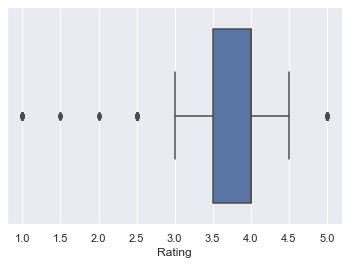

In [37]:
sns.boxplot(x=df_yelp_no_dupes_na_outlier['Rating'])

<AxesSubplot:xlabel='Distance'>

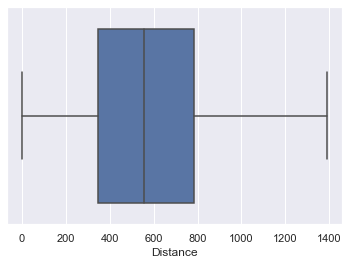

In [38]:
sns.boxplot(x=df_yelp_no_dupes_na_outlier['Distance'])

Yelp - original rows in df: 13615 

Above, there were around 5558 rows were outliers. 

## Vancouver Citybike Stations

In [39]:
df_vancouver_bikes = pd.read_csv("../data/vancouver_citybike_data.csv", index_col=0)
df_vancouver_bikes = df_vancouver_bikes.rename(columns={
    "id" : "Station_ID",
    "latitude" : "station_latitude",
    "longitude" : "station_longitude",
    "name" : "station_name"
    
})

df_vancouver_bikes = df_vancouver_bikes.drop(["timestamp", "extra.bank_card", "extra.uid"], axis=1)
display(df_vancouver_bikes.head(5))

empty_slots  free_bikes                        Station_ID  \
0           20          15  7a19c49f486d7c0c02b3685d7b240448   
1            7           9  32603a87cfca71d0f7dfa3513bad69d5   
2            2          24  6d42fa40360f9a6b2bf641c7b8bb2862   
3           15           1  66f873d641d448bd1572ab086665a458   
4           13           3  485d4d24c803cfde829ab89699fed833   

   station_latitude  station_longitude                      station_name  \
0         49.262487        -123.114397                0001 10th & Cambie   
1         49.274566        -123.121817  0004 Yaletown-Roundhouse Station   
2         49.279764        -123.110154            0005 Dunsmuir & Beatty   
3         49.260599        -123.113504     0007 12th & Yukon (City Hall)   
4         49.264215        -123.117772                    0008 8th & Ash   

   extra.slots extra.status  
0           35       online  
1           16       online  
2           26       online  
3           16       online  
4           16       online

In [40]:
df_vancouver_bikes.shape

(241, 8)

In [41]:
# check for duplicates 

duplicate_rows_df_vancouver_bikes = df_vancouver_bikes[df_vancouver_bikes.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df_vancouver_bikes.shape)

# result: there are no duplicate rows 

number of duplicate rows:  (0, 8)


# Merge DataFrames

In [42]:
df_yelp_no_dupes_na_outlier = df_yelp_no_dupes_na_outlier.rename(columns={"Station ID" : "Station_ID"})

df_bikes_yelp = pd.merge(df_vancouver_bikes, df_yelp_no_dupes_na_outlier, on="Station_ID")
df_bikes_fsq = pd.merge(df_vancouver_bikes, df_fsq_no_duplicates_no_na, on="Station_ID")

display(df_bikes_yelp.head(5))  # Yelp and Bike Stations
display(df_bikes_fsq.head(5))   # FSQ and Bike Stations

empty_slots  free_bikes                        Station_ID  \
0           20          15  7a19c49f486d7c0c02b3685d7b240448   
1           20          15  7a19c49f486d7c0c02b3685d7b240448   
2           20          15  7a19c49f486d7c0c02b3685d7b240448   
3           20          15  7a19c49f486d7c0c02b3685d7b240448   
4           20          15  7a19c49f486d7c0c02b3685d7b240448   

   station_latitude  station_longitude        station_name  extra.slots  \
0         49.262487        -123.114397  0001 10th & Cambie           35   
1         49.262487        -123.114397  0001 10th & Cambie           35   
2         49.262487        -123.114397  0001 10th & Cambie           35   
3         49.262487        -123.114397  0001 10th & Cambie           35   
4         49.262487        -123.114397  0001 10th & Cambie           35   

  extra.status        Station Name                 Yelp ID  \
0       online  0001 10th & Cambie  PrKpa6Ejv1v1WvIIywYMvg   
1       online  0001 10th & Cambie  NensKn1MSVU_rm-1Y6WlFA   
2       online  0001 10th & Cambie  X-73k3cwBjjc170MOdPa7A   
3       online  0001 10th & Cambie  dh-h2jbsa2ElN5Db0vfotQ   
4       online  0001 10th & Cambie  UkSNdIF54dvas25eh_CmFw   

                             Venue Name Price  Review Count  Rating  \
0                   Aperture Coffee Bar    $$           122     4.0   
1                         Marulilu Cafe    $$           281     4.0   
2                        Elysian Coffee    $$           207     3.5   
3  On the Grind - Pedalling Epic Coffee     $             4     5.0   
4                      Caffe Cittadella    $$           152     4.0   

    Latitude   Longitude    Distance  \
0  49.263204 -123.110470  295.924920   
1  49.263380 -123.114150  102.329817   
2  49.262940 -123.117280  221.080646   
3  49.261226 -123.113927  144.308422   
4  49.264809 -123.117267  331.734686   

                                          Address Category name  
0   243 W Broadway, Vancouver, BC V5Y 3L1, Canada  Coffee & Tea  
1   451 W Broadway, Vancouver, BC V5Y 1R4, Canada         Cafes  
2   590 W Broadway, Vancouver, BC V5Z 1E9, Canada  Coffee & Tea  
3                           Vancouver, BC, Canada  Coffee & Tea  
4  2310 Ash Street, Vancouver, BC V5Z 3C2, Canada  Coffee & Tea

empty_slots  free_bikes                        Station_ID  \
0           20          15  7a19c49f486d7c0c02b3685d7b240448   
1           20          15  7a19c49f486d7c0c02b3685d7b240448   
2           20          15  7a19c49f486d7c0c02b3685d7b240448   
3           20          15  7a19c49f486d7c0c02b3685d7b240448   
4           20          15  7a19c49f486d7c0c02b3685d7b240448   

   station_latitude  station_longitude        station_name  extra.slots  \
0         49.262487        -123.114397  0001 10th & Cambie           35   
1         49.262487        -123.114397  0001 10th & Cambie           35   
2         49.262487        -123.114397  0001 10th & Cambie           35   
3         49.262487        -123.114397  0001 10th & Cambie           35   
4         49.262487        -123.114397  0001 10th & Cambie           35   

  extra.status        Station Name                    FSQ_ID  ...   Longitude  \
0       online  0001 10th & Cambie  51b201d27dd249ae714ba728  ... -123.105307   
1       online  0001 10th & Cambie  593c332b16fa0435e42fb0d5  ... -123.114269   
2       online  0001 10th & Cambie  4aab378af964a520445920e3  ... -123.105073   
3       online  0001 10th & Cambie  5177156c498ea4fd6b901dda  ... -123.110286   
4       online  0001 10th & Cambie  4aa8320cf964a520f94f20e3  ... -123.115731   

   Distance                                            Address  \
0       674  15 8th Ave W (btwn Manitoba & Ontario), Vancou...   
1        93            467 West Broadway, Vancouver BC V5Y 1R4   
2       700  3 8th Ave W (at Ontario St), Vancouver BC V5Y 1M8   
3       299  243 West Broadway (at Alberta St), Vancouver B...   
4       144  521W Broadway W (at Cambie St), Vancouver BC V...   

         Category name Rating Popularity  Price  Total Photos  Total Ratings  \
0                  Bar    9.2   0.959464    2.0         590.0          388.0   
1  American Restaurant    6.4   0.978858    1.0          17.0            7.0   
2         Organization    6.9   0.877072    1.0          33.0           40.0   
3                 Café    8.4   0.923845    1.0          68.0           96.0   
4                 Café    5.4   0.977400    1.0          33.0           31.0   

   Total Tips  
0        75.0  
1         3.0  
2        10.0  
3        30.0  
4        15.0  

[5 rows x 22 columns]

### Provide a visualization that you used as part of your EDA process. 
Explain the initial pattern or relationship you discoved through this visualization. 

# Yelp - Data Visualization

In [43]:
df_bikes_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 0 to 9071
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   empty_slots        9072 non-null   int64  
 1   free_bikes         9072 non-null   int64  
 2   Station_ID         9072 non-null   object 
 3   station_latitude   9072 non-null   float64
 4   station_longitude  9072 non-null   float64
 5   station_name       9072 non-null   object 
 6   extra.slots        9072 non-null   int64  
 7   extra.status       9072 non-null   object 
 8   Station Name       9072 non-null   object 
 9   Yelp ID            9072 non-null   object 
 10  Venue Name         9072 non-null   object 
 11  Price              9072 non-null   object 
 12  Review Count       9072 non-null   int64  
 13  Rating             9072 non-null   float64
 14  Latitude           9072 non-null   float64
 15  Longitude          9072 non-null   float64
 16  Distance           9072 

In [44]:
df_bikes_yelp.describe()

empty_slots   free_bikes  station_latitude  station_longitude  \
count  9072.000000  9072.000000       9072.000000        9072.000000   
mean      9.885472     8.833003         49.272336        -123.116288   
std       5.823593     5.969016          0.011065           0.027545   
min       0.000000     0.000000         49.238105        -123.191458   
25%       6.000000     4.000000         49.263837        -123.134356   
50%      10.000000     8.000000         49.272470        -123.116963   
75%      14.000000    13.000000         49.280852        -123.097978   
max      36.000000    30.000000         49.312568        -123.056909   

       extra.slots  Review Count       Rating     Latitude    Longitude  \
count  9072.000000   9072.000000  9072.000000  9072.000000  9072.000000   
mean     18.807209    171.133929     3.937886    49.272631  -123.115962   
std       5.243659    190.362131     0.492782     0.010861     0.027218   
min      12.000000      1.000000     1.000000    49.231127  -123.202775   
25%      15.000000     47.000000     3.500000    49.264190  -123.134152   
50%      18.000000     98.000000     4.000000    49.272358  -123.117130   
75%      20.000000    211.000000     4.000000    49.281360  -123.100685   
max      40.000000   1015.000000     5.000000    49.313037  -123.043871   

          Distance  
count  9072.000000  
mean    572.190696  
std     288.754614  
min       1.973312  
25%     346.621707  
50%     555.743854  
75%     785.191486  
max    1389.257447

In [45]:
df_bikes_yelp.corr()

empty_slots  free_bikes  station_latitude  \
empty_slots           1.000000   -0.610220         -0.166015   
free_bikes           -0.610220    1.000000          0.314157   
station_latitude     -0.166015    0.314157          1.000000   
station_longitude    -0.126624   -0.061475         -0.066674   
extra.slots           0.422453    0.456527          0.171440   
Review Count         -0.009766    0.058608          0.203831   
Rating               -0.037840    0.055858          0.136034   
Latitude             -0.162474    0.284511          0.929805   
Longitude            -0.127544   -0.043743         -0.063901   
Distance              0.005581   -0.021452         -0.076994   

                   station_longitude  extra.slots  Review Count    Rating  \
empty_slots                -0.126624     0.422453     -0.009766 -0.037840   
free_bikes                 -0.061475     0.456527      0.058608  0.055858   
station_latitude           -0.066674     0.171440      0.203831  0.136034   
station_longitude           1.000000    -0.211386     -0.072096  0.030660   
extra.slots                -0.211386     1.000000      0.054794  0.020643   
Review Count               -0.072096     0.054794      1.000000  0.151656   
Rating                      0.030660     0.020643      0.151656  1.000000   
Latitude                   -0.052028     0.141778      0.220124  0.149228   
Longitude                   0.974697    -0.192240     -0.071836  0.029986   
Distance                   -0.035011    -0.016783     -0.004282  0.047245   

                   Latitude  Longitude  Distance  
empty_slots       -0.162474  -0.127544  0.005581  
free_bikes         0.284511  -0.043743 -0.021452  
station_latitude   0.929805  -0.063901 -0.076994  
station_longitude -0.052028   0.974697 -0.035011  
extra.slots        0.141778  -0.192240 -0.016783  
Review Count       0.220124  -0.071836 -0.004282  
Rating             0.149228   0.029986  0.047245  
Latitude           1.000000  -0.050139 -0.055313  
Longitude         -0.050139   1.000000 -0.023416  
Distance          -0.055313  -0.023416  1.000000

As seen above, the number of 'extra.slots' (total bike slots)  has a very slight positive correlation (0.0547) with "Review Count" (the number of reviews from customers). 

We also see a slight positive correlation between 'free bikes' (bikes available at the station) and "Review Count" has a slight correlation (0.0601). 

Lastly, we see a slight positive correlation between distance (the distance in meters) to the rating (0.047245). 


<AxesSubplot:>

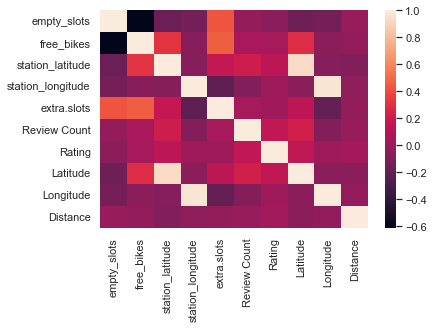

In [46]:
sns.heatmap(df_bikes_yelp.corr())

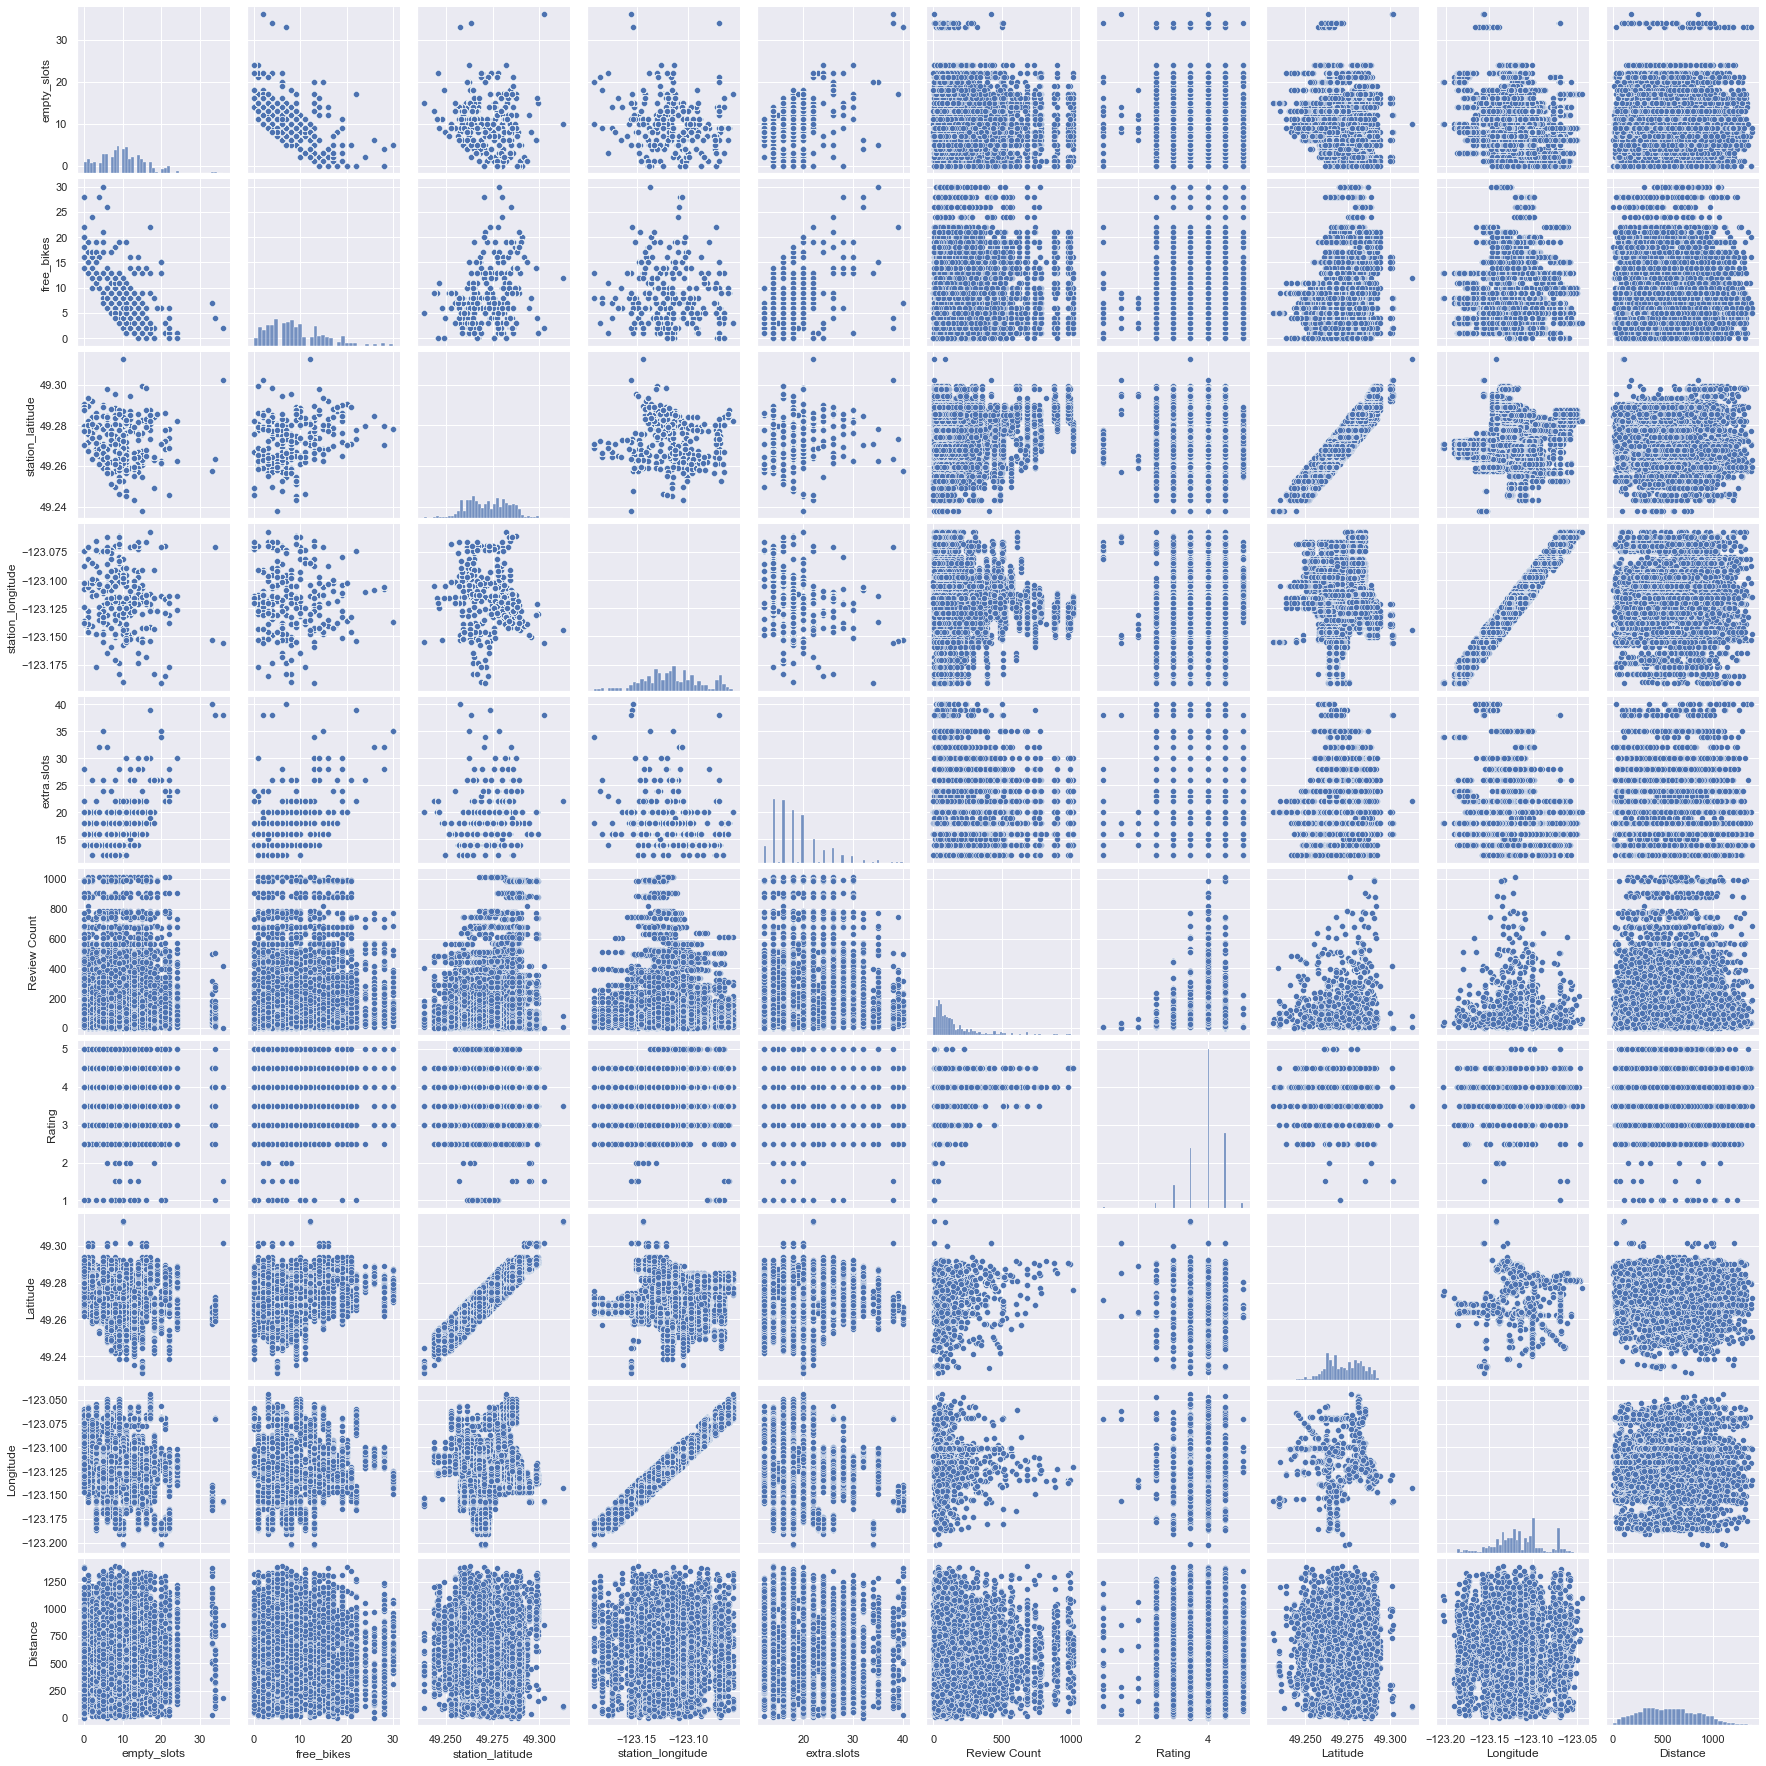

In [47]:
sns.pairplot(df_bikes_yelp)

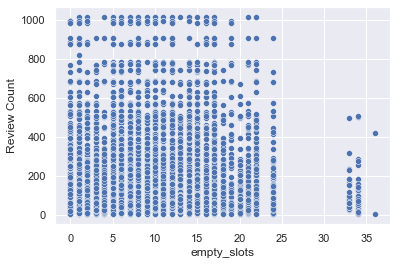

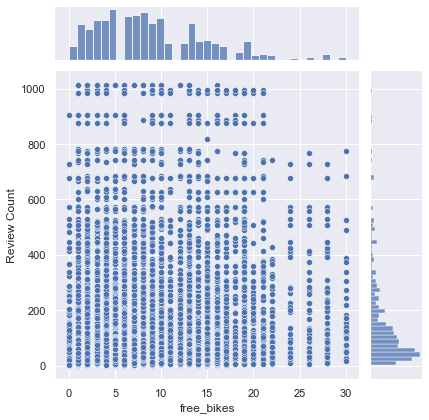

In [48]:
sns.scatterplot(data=df_bikes_yelp, x="empty_slots", y="Review Count")

sns.jointplot(data=df_bikes_yelp, x="free_bikes", y="Review Count")


#### Conclusion for Yelp Data Visualization: 
Although there seems to be a correlation between the variables below, there is no  significant positive correlation between:
* the total number of bike slots ('extra.slots') _and_ the number of reviews ('review count')
* the number of available bikes ('free bikes') _and_ the number of reviews from customers (review count)
* the distance from station ('distance') _and_ the rating from customers ('rating')

# Foursquare - Data Visualization

In [49]:
df_bikes_fsq.corr()

empty_slots  free_bikes  station_latitude  \
empty_slots           1.000000   -0.609195         -0.130262   
free_bikes           -0.609195    1.000000          0.322627   
station_latitude     -0.130262    0.322627          1.000000   
station_longitude    -0.100700   -0.068792         -0.080246   
extra.slots           0.408828    0.471164          0.224166   
Latitude             -0.112803    0.299130          0.960596   
Longitude            -0.103927   -0.053238         -0.074111   
Distance             -0.062099   -0.047383         -0.229114   
Rating               -0.002254    0.005070          0.012624   
Popularity           -0.047508    0.049910          0.039888   
Price                 0.040093   -0.027221          0.047011   
Total Photos         -0.031598    0.055808          0.073429   
Total Ratings        -0.018791    0.057166          0.092704   
Total Tips            0.007639    0.030793          0.092371   

                   station_longitude  extra.slots  Latitude  Longitude  \
empty_slots                -0.100700     0.408828 -0.112803  -0.103927   
free_bikes                 -0.068792     0.471164  0.299130  -0.053238   
station_latitude           -0.080246     0.224166  0.960596  -0.074111   
station_longitude           1.000000    -0.190046 -0.068711   0.986165   
extra.slots                -0.190046     1.000000  0.216349  -0.175721   
Latitude                   -0.068711     0.216349  1.000000  -0.063093   
Longitude                   0.986165    -0.175721 -0.063093   1.000000   
Distance                   -0.012965    -0.121673 -0.241508  -0.004703   
Rating                      0.021748     0.003314  0.004809   0.025555   
Popularity                  0.044155     0.005790  0.041415   0.048108   
Price                      -0.026276     0.014035  0.043920  -0.025969   
Total Photos                0.031817     0.030017  0.086375   0.030860   
Total Ratings               0.032481     0.045130  0.106257   0.031476   
Total Tips                  0.012434     0.043728  0.104199   0.011713   

                   Distance    Rating  Popularity     Price  Total Photos  \
empty_slots       -0.062099 -0.002254   -0.047508  0.040093     -0.031598   
free_bikes        -0.047383  0.005070    0.049910 -0.027221      0.055808   
station_latitude  -0.229114  0.012624    0.039888  0.047011      0.073429   
station_longitude -0.012965  0.021748    0.044155 -0.026276      0.031817   
extra.slots       -0.121673  0.003314    0.005790  0.014035      0.030017   
Latitude          -0.241508  0.004809    0.041415  0.043920      0.086375   
Longitude         -0.004703  0.025555    0.048108 -0.025969      0.030860   
Distance           1.000000  0.031126    0.038695 -0.013716      0.067909   
Rating             0.031126  1.000000    0.163670  0.246779      0.417232   
Popularity         0.038695  0.163670    1.000000  0.069984      0.210012   
Price             -0.013716  0.246779    0.069984  1.000000      0.327829   
Total Photos       0.067909  0.417232    0.210012  0.327829      1.000000   
Total Ratings      0.023279  0.458135    0.223608  0.337858      0.938914   
Total Tips        -0.002542  0.375863    0.172781  0.300144      0.816407   

                   Total Ratings  Total Tips  
empty_slots            -0.018791    0.007639  
free_bikes              0.057166    0.030793  
station_latitude        0.092704    0.092371  
station_longitude       0.032481    0.012434  
extra.slots             0.045130    0.043728  
Latitude                0.106257    0.104199  
Longitude               0.031476    0.011713  
Distance                0.023279   -0.002542  
Rating                  0.458135    0.375863  
Popularity              0.223608    0.172781  
Price                   0.337858    0.300144  
Total Photos            0.938914    0.816407  
Total Ratings           1.000000    0.836997  
Total Tips              0.836997    1.000000

<AxesSubplot:>

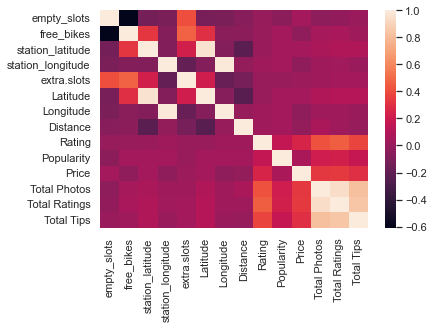

In [50]:
sns.heatmap(df_bikes_fsq.corr())

In [51]:
df_bikes_fsq.head(1)

empty_slots  free_bikes                        Station_ID  \
0           20          15  7a19c49f486d7c0c02b3685d7b240448   

   station_latitude  station_longitude        station_name  extra.slots  \
0         49.262487        -123.114397  0001 10th & Cambie           35   

  extra.status        Station Name                    FSQ_ID  ...   Longitude  \
0       online  0001 10th & Cambie  51b201d27dd249ae714ba728  ... -123.105307   

   Distance                                            Address  Category name  \
0       674  15 8th Ave W (btwn Manitoba & Ontario), Vancou...            Bar   

  Rating Popularity  Price  Total Photos  Total Ratings  Total Tips  
0    9.2   0.959464    2.0         590.0          388.0        75.0  

[1 rows x 22 columns]

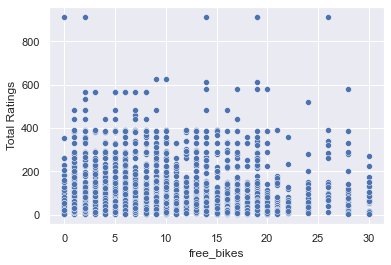

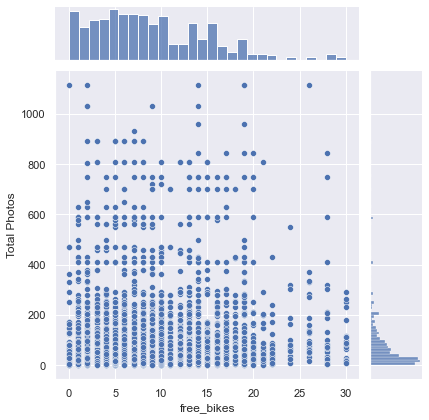

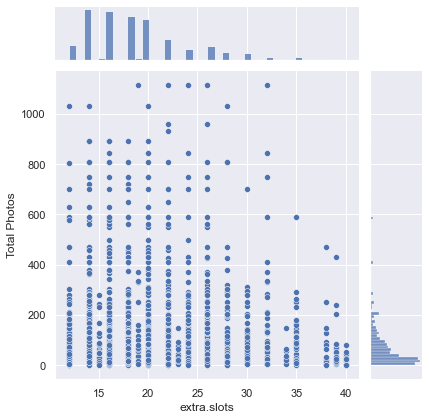

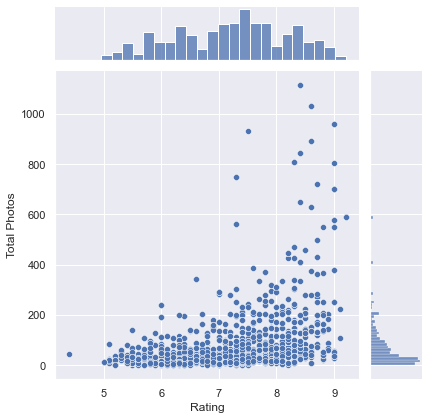

In [53]:
# Foursquare

sns.scatterplot(data=df_bikes_fsq, x="free_bikes", y="Total Ratings")

sns.jointplot(data=df_bikes_fsq, x="free_bikes", y="Total Photos")

sns.jointplot(data=df_bikes_fsq, x="extra.slots", y="Total Photos")

sns.jointplot(data=df_bikes_fsq, x="Rating", y="Total Photos")

####  Conclusion for Foursquare Data Visualization: 
As seen above, number of bikes does not seem to have a strong correlation with the number of photos taken at the POI location.

However, we can take note that there is a very slight correlation between the variables below:

* total available bikes ('free bikes') and the total number of ratings ('Total Ratings') 0.067835

* total available bikes ('free bikes') and the total number of photos taken and submitted ('Total Photos') 0.067464

* total available bikes ('free bikes') and the popularity of the venue ('Popularity') 0.053384



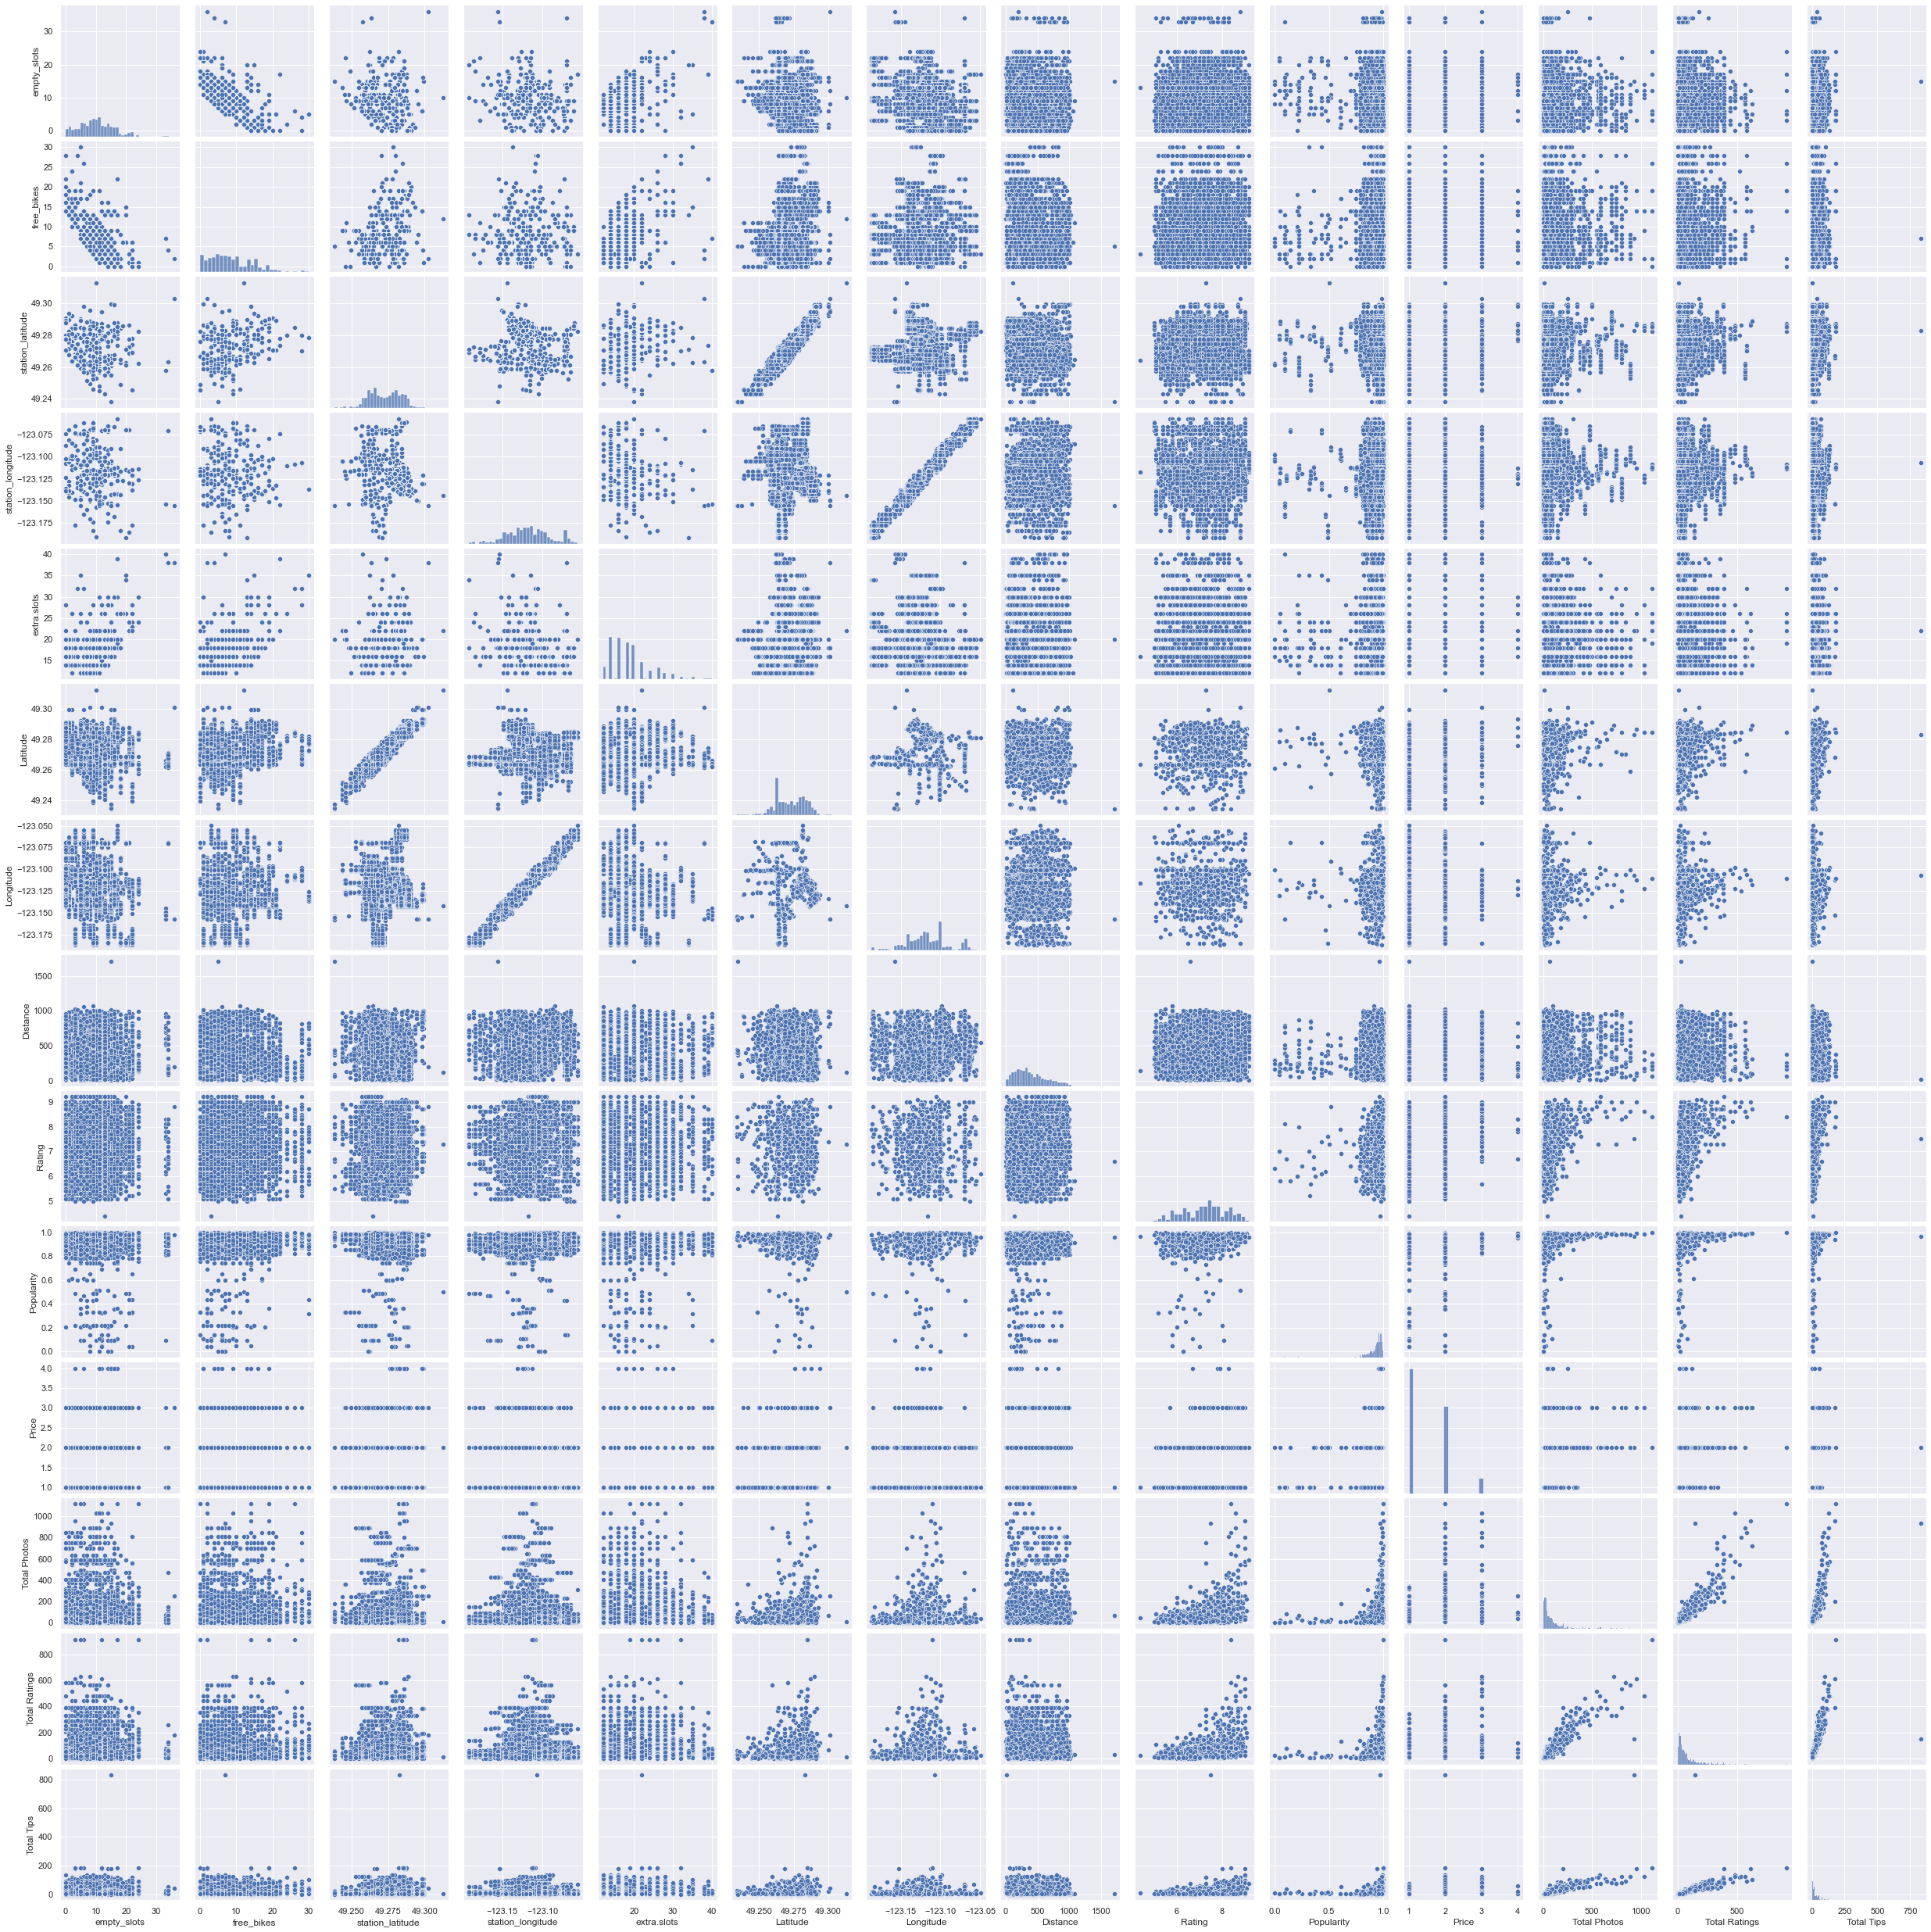

In [55]:
sns.pairplot(df_bikes_fsq)

In [56]:
df_bikes_fsq.to_csv("../data/bikes_fsq_data.csv")

# SQLite3 Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [57]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
        cursor.close()
    except Error as e:
        print(f"The error '{e}' occurred")

In [58]:
connection = create_connection("project_2.sqlite")

Connection to SQLite DB successful


In [59]:
create_bike_data_table = """
CREATE TABLE IF NOT EXISTS bike_stations (
    Station_ID VARCHAR NOT NULL,
    name TEXT NOT NULL,
    total_slots INTEGER,
    empty_slots INTEGER,
    free_bikes INTEGER,
    longitude FLOAT,
    latitude FLOAT,
    status TEXT
);
"""

In [60]:
execute_query(connection, create_bike_data_table)  

Query executed successfully


In [61]:
# Rename columns

df_bikes = df_vancouver_bikes.rename(columns={
    'station_latitude' : 'latitude',
    'station_longitude': 'longitude',
    'station_name' : 'name',
    'extra.slots' : 'total_slots',
    'extra.status' : 'status'
})
display(df_bikes.head(5))

empty_slots  free_bikes                        Station_ID   latitude  \
0           20          15  7a19c49f486d7c0c02b3685d7b240448  49.262487   
1            7           9  32603a87cfca71d0f7dfa3513bad69d5  49.274566   
2            2          24  6d42fa40360f9a6b2bf641c7b8bb2862  49.279764   
3           15           1  66f873d641d448bd1572ab086665a458  49.260599   
4           13           3  485d4d24c803cfde829ab89699fed833  49.264215   

    longitude                              name  total_slots  status  
0 -123.114397                0001 10th & Cambie           35  online  
1 -123.121817  0004 Yaletown-Roundhouse Station           16  online  
2 -123.110154            0005 Dunsmuir & Beatty           26  online  
3 -123.113504     0007 12th & Yukon (City Hall)           16  online  
4 -123.117772                    0008 8th & Ash           16  online

In [62]:
# df_bikes.to_sql(name="bike_stations", con=connection, if_exists='append', index=False)

In [63]:
# select_bike_stations = "SELECT * from bike_stations"
# bike_stations = execute_query(connection, select_bike_stations)

# for station in bike_stations:
#     print(station)

In [64]:
df_bikes.to_sql('bike_stations', con=connection, if_exists='replace', index=False)

241

In [65]:
connection.execute("SELECT * from bike_stations").fetchall()

[(20,
  15,
  '7a19c49f486d7c0c02b3685d7b240448',
  49.262487,
  -123.114397,
  '0001 10th & Cambie',
  35,
  'online'),
 (7,
  9,
  '32603a87cfca71d0f7dfa3513bad69d5',
  49.274566,
  -123.121817,
  '0004 Yaletown-Roundhouse Station',
  16,
  'online'),
 (2,
  24,
  '6d42fa40360f9a6b2bf641c7b8bb2862',
  49.279764,
  -123.110154,
  '0005 Dunsmuir & Beatty',
  26,
  'online'),
 (15,
  1,
  '66f873d641d448bd1572ab086665a458',
  49.260599,
  -123.113504,
  '0007 12th & Yukon (City Hall)',
  16,
  'online'),
 (13,
  3,
  '485d4d24c803cfde829ab89699fed833',
  49.264215,
  -123.117772,
  '0008 8th & Ash',
  16,
  'online'),
 (9,
  5,
  'b07d513f87897cff7319a0e59d7e567c',
  49.270877,
  -123.115103,
  '0009 Spyglass & Seawall',
  14,
  'online'),
 (11,
  3,
  'd1c9556d92f329703229fb3e33899a3b',
  49.26893,
  -123.11813,
  '0010 Stamps Landing',
  14,
  'online'),
 (1,
  19,
  '95e624191c655f50e401d280cd39a9ad',
  49.271721,
  -123.104207,
  '0011 Ontario & Seawall',
  20,
  'online'),
 (12,
  

### Look at the data before and after the join to validate your data.

## FSQ and Citybike Stations

In [66]:

create_fsq_data_table = """
CREATE TABLE IF NOT EXISTS fsq_data (
    Station_ID VARCHAR NOT NULL,
    station_name TEXT,
    station_latitude FLOAT NOT NULL,
    station_longitude FLOAT NOT NULL,
    free_bikes FLOAT NOT NULL,
    empty_slots FLOAT,
    total_slots FLOAT,
    FSQ_ID VARCHAR NOT NULL,
    Venue_Name TEXT NOT NULL,
    Longitude FLOAT,
    Latitude FLOAT,
    Address TEXT,
    Category_Name TEXT NOT NULL,
    Rating FLOAT,
    Popularity INTEGER,
    Price FLOAT,
    Total_Photos FLOAT,
    Total_Ratings FLOAT,
    Total_Tips INTEGER
);
"""

In [67]:
# Rename columns

df_bikes_fsq = df_bikes_fsq.rename(columns={
    'extra.slots' : "total_slots",
    'Venue Name' : 'Venue_Name',
    'Category name': 'Category_Name',
    'Total Photos' : 'Total_Photos',
    'Total Ratings' : 'Total_Ratings',
    'Total Tips' : 'Total_Tips'
})

In [68]:
df_bikes_fsq.head(1)

empty_slots  free_bikes                        Station_ID  \
0           20          15  7a19c49f486d7c0c02b3685d7b240448   

   station_latitude  station_longitude        station_name  total_slots  \
0         49.262487        -123.114397  0001 10th & Cambie           35   

  extra.status        Station Name                    FSQ_ID  ...   Longitude  \
0       online  0001 10th & Cambie  51b201d27dd249ae714ba728  ... -123.105307   

   Distance                                            Address  Category_Name  \
0       674  15 8th Ave W (btwn Manitoba & Ontario), Vancou...            Bar   

  Rating Popularity  Price  Total_Photos  Total_Ratings  Total_Tips  
0    9.2   0.959464    2.0         590.0          388.0        75.0  

[1 rows x 22 columns]

In [69]:
df_bikes_fsq = df_bikes_fsq[[
    "Station_ID",
    "station_name", 
    "station_latitude",
    "station_longitude",
    "free_bikes", 
    "empty_slots", 
    "total_slots", 
    "FSQ_ID",
    "Venue_Name",
    "Longitude",
    "Latitude",
    "Address",
    "Category_Name",
    "Rating",
    "Popularity",
    "Price",
    "Total_Photos",
    "Total_Ratings",
    "Total_Tips"
]]

In [70]:
execute_query(connection, create_fsq_data_table)  

Query executed successfully


In [71]:
# after creating SQL table headerb
df_bikes_fsq.to_sql('fsq_data', con=connection, if_exists='replace', index=False)

4285

In [72]:
connection.execute("SELECT * from fsq_data").fetchall()

[('7a19c49f486d7c0c02b3685d7b240448',
  '0001 10th & Cambie',
  49.262487,
  -123.114397,
  15,
  20,
  35,
  '51b201d27dd249ae714ba728',
  '33 Acres Brewing Co',
  -123.105307,
  49.263877,
  '15 8th Ave W (btwn Manitoba & Ontario), Vancouver BC V5Y 1M8',
  'Bar',
  9.2,
  0.959464448805892,
  2.0,
  590.0,
  388.0,
  75.0),
 ('7a19c49f486d7c0c02b3685d7b240448',
  '0001 10th & Cambie',
  49.262487,
  -123.114397,
  15,
  20,
  35,
  '593c332b16fa0435e42fb0d5',
  'A&W Restaurant',
  -123.114269,
  49.26339,
  '467 West Broadway, Vancouver BC V5Y 1R4',
  'American Restaurant',
  6.4,
  0.978857775791376,
  1.0,
  17.0,
  7.0,
  3.0),
 ('7a19c49f486d7c0c02b3685d7b240448',
  '0001 10th & Cambie',
  49.262487,
  -123.114397,
  15,
  20,
  35,
  '4aab378af964a520445920e3',
  'Anza Club',
  -123.105073,
  49.263985,
  '3 8th Ave W (at Ontario St), Vancouver BC V5Y 1M8',
  'Organization',
  6.9,
  0.8770719574046365,
  1.0,
  33.0,
  40.0,
  10.0),
 ('7a19c49f486d7c0c02b3685d7b240448',
  '000

## Yelp and Citybike Stations

In [73]:
create_yelp_data_table = """
CREATE TABLE IF NOT EXISTS yelp_data (
    Station_ID VARCHAR NOT NULL,
    station_name TEXT,
    station_latitude FLOAT NOT NULL,
    station_longitude FLOAT NOT NULL,
    free_bikes FLOAT NOT NULL,
    empty_slots FLOAT,
    total_slots FLOAT,
    YELP_ID VARCHAR NOT NULL,
    Venue_Name TEXT NOT NULL,
    Category_Name TEXT NOT NULL,
    Rating FLOAT,
    Popularity INTEGER,
    Price VARCHAR,
    Address VARCHAR,
    Review_Count FLOAT,
    Longitude FLOAT,
    Latitude FLOAT,
    Distance FLOAT
);
"""

In [74]:
# Rename columns

df_bikes_yelp = df_bikes_yelp.rename(columns={
    'extra.slots' : "total_slots",
    'Venue Name' : 'Venue_Name',
    'Category name': 'Category_Name',
    'Review Count' : "Review_Count",
    'Yelp ID': 'Yelp_ID'
})

In [75]:
df_bikes_yelp.head(1)

empty_slots  free_bikes                        Station_ID  \
0           20          15  7a19c49f486d7c0c02b3685d7b240448   

   station_latitude  station_longitude        station_name  total_slots  \
0         49.262487        -123.114397  0001 10th & Cambie           35   

  extra.status        Station Name                 Yelp_ID  \
0       online  0001 10th & Cambie  PrKpa6Ejv1v1WvIIywYMvg   

            Venue_Name Price  Review_Count  Rating   Latitude  Longitude  \
0  Aperture Coffee Bar    $$           122     4.0  49.263204 -123.11047   

    Distance                                        Address Category_Name  
0  295.92492  243 W Broadway, Vancouver, BC V5Y 3L1, Canada  Coffee & Tea

In [76]:
df_bikes_yelp = df_bikes_yelp[[
    "Station_ID",
    "station_name", 
    "station_latitude",
    "station_longitude",
    "free_bikes", 
    "empty_slots", 
    "total_slots",
    "Yelp_ID", 
    "Venue_Name",
    "Category_Name",
    "Rating",
    "Price", 
    "Address", 
    "Review_Count", 
    "Longitude", 
    "Latitude",
    "Distance"
]]

In [77]:
df_bikes_yelp.to_sql('yelp_data', con=connection, if_exists='replace', index=False)

9072

In [78]:
connection.execute("SELECT * from yelp_data").fetchall()

[('7a19c49f486d7c0c02b3685d7b240448',
  '0001 10th & Cambie',
  49.262487,
  -123.114397,
  15,
  20,
  35,
  'PrKpa6Ejv1v1WvIIywYMvg',
  'Aperture Coffee Bar',
  'Coffee & Tea',
  4.0,
  '$$',
  '243 W Broadway, Vancouver, BC V5Y 3L1, Canada',
  122,
  -123.110469593,
  49.2632037459,
  295.9249203529791),
 ('7a19c49f486d7c0c02b3685d7b240448',
  '0001 10th & Cambie',
  49.262487,
  -123.114397,
  15,
  20,
  35,
  'NensKn1MSVU_rm-1Y6WlFA',
  'Marulilu Cafe',
  'Cafes',
  4.0,
  '$$',
  '451 W Broadway, Vancouver, BC V5Y 1R4, Canada',
  281,
  -123.11415,
  49.26338,
  102.3298169925688),
 ('7a19c49f486d7c0c02b3685d7b240448',
  '0001 10th & Cambie',
  49.262487,
  -123.114397,
  15,
  20,
  35,
  'X-73k3cwBjjc170MOdPa7A',
  'Elysian Coffee',
  'Coffee & Tea',
  3.5,
  '$$',
  '590 W Broadway, Vancouver, BC V5Z 1E9, Canada',
  207,
  -123.11728,
  49.26294,
  221.08064577489415),
 ('7a19c49f486d7c0c02b3685d7b240448',
  '0001 10th & Cambie',
  49.262487,
  -123.114397,
  15,
  20,
  35,


## Success via VSCode -- End.